In [1]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
# %config InlineBackend.figure_format = 'retina'

Импортируем matplotlib и numpy, используя типичные конвенции сокращенных имен.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib поддерживает два интерфейса - основанный на состояниях (pyplot, plt) и объектно-ориентированный (когда вы сами создаете фигуры, оси и все такое). Первый хорошо подходит для простых графиков, второй для более сложных задач. Обычно их несколько перемешивают между собой.
Начнем с pyplot.

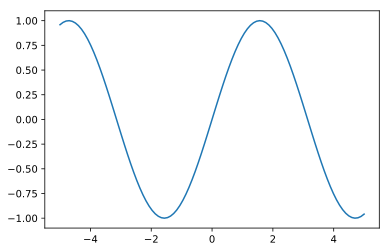

In [3]:
x = np.linspace(-5, 5, 100) # 100 равноудаленных чисел между -5 и 5
y = np.sin(x) # вектор из 100 синусов
plt.plot(x, y) # малюем график
plt.show() # отображаем его. Есть разные бэкэнды (winapi, qt, tk), здесь же график отправляется в jupyter

Прокачаем график

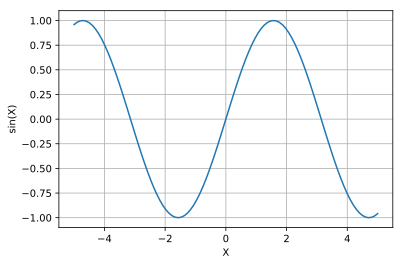

In [4]:
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('sin(X)')
plt.grid()
plt.show()

Помимо метода plot, соединяющего точки, есть метод scatter, который просто их отображает

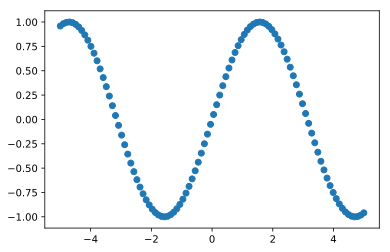

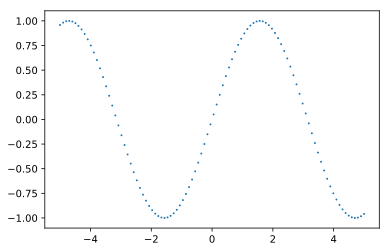

In [5]:
plt.scatter(x,y)
plt.show()
plt.scatter(x,y, s=1) # уменьшим размер
plt.show()

Большинство методов pyplot делегируют исполнение низлежащим объектам, например объектам класса Axes, Figure. Для лучшего контроля, можно работать с ними напрямую

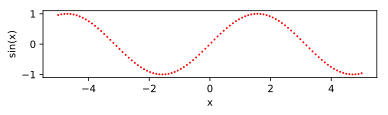

In [6]:
fig = plt.figure() # создать новую фигуру (окно)
ax = fig.add_subplot('111') # добавить новый график (111 проигнорировать)
ax.scatter(x,y, s=1, c='red')
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')
ax.set_aspect('equal') # Устанавливаем равные масштабы по осям.
plt.show()

Можно поместить множество графиков на одну фигуру. Для этого в методе add_subplot указывается количество строк и столбцов на фигуре, и текущий номер графика.

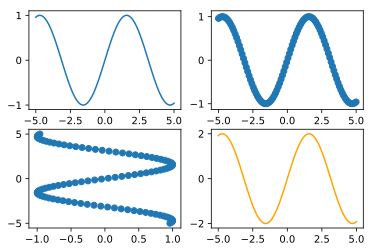

In [7]:
fig = plt.figure() # создать новую фигуру (окно)
ax = fig.add_subplot('221')
ax.plot(x,y)
ax = fig.add_subplot('222')
ax.scatter(x,y)
ax = fig.add_subplot(2,2,3) # альтернатива '223'
ax.scatter(y,x)
ax = fig.add_subplot('224')
ax.plot(x, y * 2, color='orange')
plt.show()

Matplotlib также позволяет строить 3d графики. <br>
Функция нескольких переменных часто вычисляется на сетке значений (т.е. для каждого значения задается интервал с шагом, и сетка - это перебор их всевозможных комбинаций). Например, пусть $x$ принимает 3 значения от 0 до 3, а $y$ - 3 значения от -1 до -4. Функция mgrid обобщает функцию linspace.

In [8]:
#3j - комплексное число, используется чтобы указать, что это количество значений
#Если использовать вещ. число, то оно будет проинтерпретировано как длина шага
# Такой вот интерфейс)
xx, yy = np.mgrid[0:3:3j, -1:-4:3j] 
print(xx)
print('-----')
print(yy)
print('-----')
print(xx + yy)

[[0.  0.  0. ]
 [1.5 1.5 1.5]
 [3.  3.  3. ]]
-----
[[-1.  -2.5 -4. ]
 [-1.  -2.5 -4. ]
 [-1.  -2.5 -4. ]]
-----
[[-1.  -2.5 -4. ]
 [ 0.5 -1.  -2.5]
 [ 2.   0.5 -1. ]]


Вычислим более сложную функцию с большей точностью

In [9]:
xx, yy = np.mgrid[-10:10:100j, -10:10:100j]
zz = xx ** 2 + yy ** 2

Построим 3d график. Wireframe-график рисует поверхность, похожую на каркас.

In [10]:
from mpl_toolkits.mplot3d import Axes3D

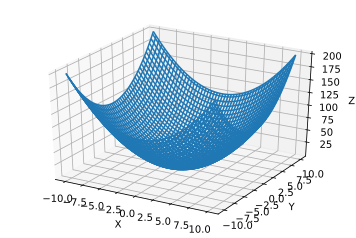

In [11]:
fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')
ax.plot_wireframe(xx,yy,zz)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Эту же функцию мы можем отобразить в виде цветного 2d графика

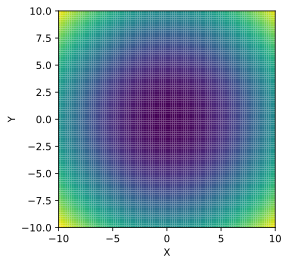

In [12]:
fig = plt.figure()
ax = fig.add_subplot('111')

ax.pcolormesh(xx, yy, zz)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
plt.show()

И в виде контуров (графиков, где каждый контур соответствует месту, где функция имеет одинаковое значение.) Отметим, что для функции $z = x^2 + y^2$, контуры будут иметь форму окружностей.

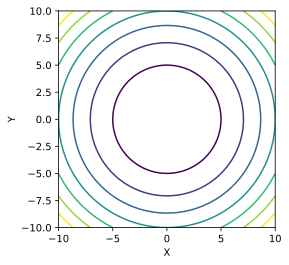

In [13]:
fig = plt.figure()
ax = fig.add_subplot('111')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.contour(xx,yy,zz)
ax.set_aspect('equal')
plt.show()

На график можно также наложить легенду. Хотя её можно сделать полностью кастомной, часто удобнее сделать её автоматически, накладывая метки на отдельные части графика

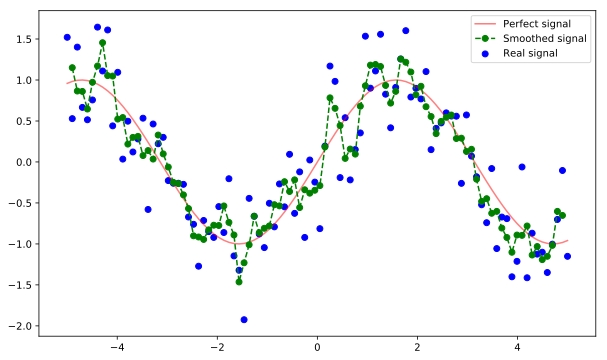

In [14]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot('111')

x = np.linspace(-5,5,100)
y = np.sin(x)
ynoise = y + np.random.normal(scale=0.4, size=y.size)
ysmoothed = (ynoise[:-2] + ynoise[1:-1] + ynoise[2:]) / 3 # сгладим точки из ynoise через скользящее среднее

ax.plot(x,y,color='red', label='Perfect signal', alpha=0.5)
ax.scatter(x, ynoise, c='blue', label='Real signal')
ax.plot(x[1:-1], ysmoothed, c='green', linestyle='--', marker='o', label='Smoothed signal')
ax.legend()
plt.show()

Гистограммы и столбчатые диаграммы также имеются

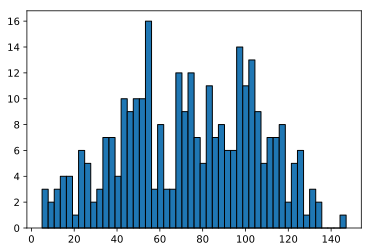

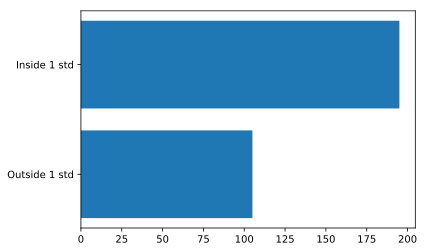

In [15]:
x1 = np.random.randint(0,100,size=300)
x2 = np.random.randint(0,50,size=300)
s = x1 + x2 # Будем строить гистограмму суммы двух случайных чисел из диапазонов

fig = plt.figure()
ax = fig.add_subplot('111')
ax.hist(s, bins=50, edgecolor='black') #bins - количество интервалов на гистограмме
plt.show()

std = np.std(s) # среднеквадратичное отклонение
mean = np.mean(s) # Среднее значение

fig = plt.figure()
ax = fig.add_subplot('111')
yticks = np.arange(2) + 1
# считаем количество точек внутри 1го стд. отклонения
in_1std = s[(s > mean - 1*std) & (s < mean + 1*std)].size 

ax.barh(yticks, width=(s.size - in_1std, in_1std))
ax.set_yticks(yticks)
ax.set_yticklabels(['Outside 1 std', 'Inside 1 std'])
plt.show()